In [2]:
import pandas as pd
teams = pd.read_csv("teams.csv")

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [3]:
teams = teams[["team", "country", "year", "athletes", "medals", "prev_medals", "prev_3_medals", "age"]]
teams

,team,country,year,athletes,medals,prev_medals,prev_3_medals,age
0,AFG,Afghanistan,1964,8,0,0.0,0.0,22.0
1,AFG,Afghanistan,1968,5,0,0.0,0.0,23.2
2,AFG,Afghanistan,1972,8,0,0.0,0.0,29.0
3,AFG,Afghanistan,1980,11,0,0.0,0.0,23.6
4,AFG,Afghanistan,2004,5,0,0.0,0.0,18.6
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0,0.0,0.0,25.0
2140,ZIM,Zimbabwe,2004,14,3,0.0,0.0,25.1
2141,ZIM,Zimbabwe,2008,16,4,3.0,1.0,26.1
2142,ZIM,Zimbabwe,2012,9,0,4.0,2.3,27.3


In [6]:
teams.select_dtypes(include=['number']).corr()["medals"]

year            -0.021603
athletes         0.840817
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
age              0.025096
Name: medals, dtype: float64

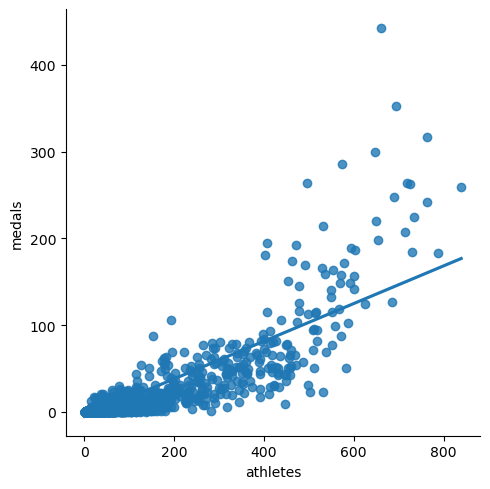

In [8]:
import seaborn as sns
sns.lmplot(x = "athletes", y = "medals", data = teams, fit_reg = True, ci = None)

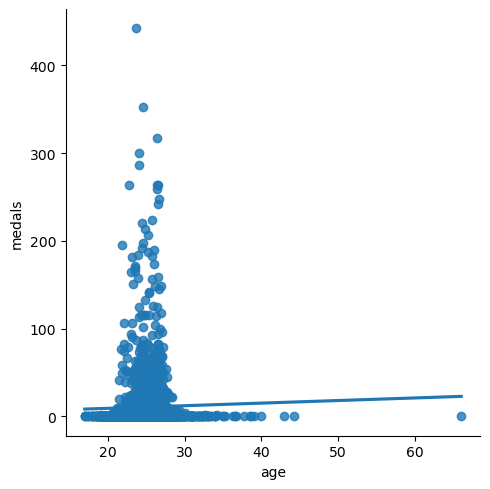

In [9]:
sns.lmplot(x = "age", y  = "medals", data = teams, fit_reg = True, ci = None)

<Axes: ylabel='Frequency'>

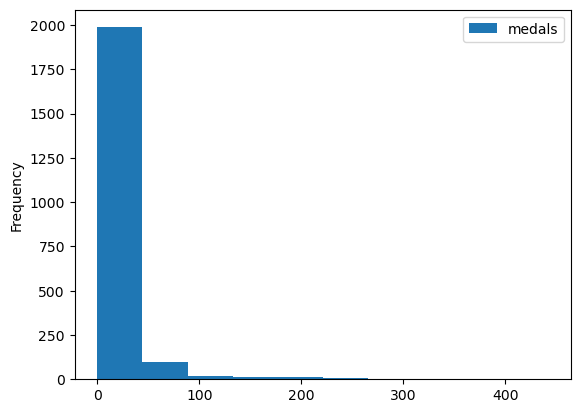

In [11]:
teams.plot.hist(y = "medals")

In [12]:
teams[teams.isnull().any(axis = 1)]

,team,country,year,athletes,medals,prev_medals,prev_3_medals,age
19,ALB,Albania,1992,9,0,NaN,NaN,25.3
26,ALG,Algeria,1964,7,0,NaN,NaN,26.0
39,AND,Andorra,1976,3,0,NaN,NaN,28.3
50,ANG,Angola,1980,17,0,NaN,NaN,17.4
59,ANT,Antigua and Barbuda,1976,17,0,NaN,NaN,23.2
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,0,NaN,NaN,20.5
2103,YAR,North Yemen,1984,3,0,NaN,NaN,27.7
2105,YEM,Yemen,1992,8,0,NaN,NaN,19.6
2112,YMD,South Yemen,1988,5,0,NaN,NaN,23.6


In [13]:
teams = teams.dropna()

In [14]:
teams

,team,country,year,athletes,medals,prev_medals,prev_3_medals,age
0,AFG,Afghanistan,1964,8,0,0.0,0.0,22.0
1,AFG,Afghanistan,1968,5,0,0.0,0.0,23.2
2,AFG,Afghanistan,1972,8,0,0.0,0.0,29.0
3,AFG,Afghanistan,1980,11,0,0.0,0.0,23.6
4,AFG,Afghanistan,2004,5,0,0.0,0.0,18.6
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0,0.0,0.0,25.0
2140,ZIM,Zimbabwe,2004,14,3,0.0,0.0,25.1
2141,ZIM,Zimbabwe,2008,16,4,3.0,1.0,26.1
2142,ZIM,Zimbabwe,2012,9,0,4.0,2.3,27.3


In [15]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [16]:
train.shape

(1609, 8)

In [17]:
test.shape

(405, 8)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [22]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [23]:
reg.fit(train[predictors], train["medals"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
predictions = reg.predict(test[predictors])

In [25]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [26]:
test["predictions"] = predictions
test

,team,country,year,athletes,medals,prev_medals,prev_3_medals,age,predictions
6,AFG,Afghanistan,2012,6,1,1.0,0.3,24.8,-0.961221
7,AFG,Afghanistan,2016,3,0,1.0,0.7,24.7,-1.176333
24,ALB,Albania,2012,10,0,0.0,0.0,25.7,-1.425032
25,ALB,Albania,2016,6,0,0.0,0.0,23.7,-1.711847
37,ALG,Algeria,2012,39,1,2.0,2.3,24.8,2.155629
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0,0.0,0.0,19.3,-1.926958
2131,ZAM,Zambia,2012,7,0,0.0,0.0,22.6,-1.640143
2132,ZAM,Zambia,2016,7,0,0.0,0.0,24.1,-1.640143
2142,ZIM,Zimbabwe,2012,9,0,4.0,2.3,27.3,1.505767


In [27]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [28]:
test["predictions"] = test["predictions"].round()

In [29]:
test

,team,country,year,athletes,medals,prev_medals,prev_3_medals,age,predictions
6,AFG,Afghanistan,2012,6,1,1.0,0.3,24.8,0.0
7,AFG,Afghanistan,2016,3,0,1.0,0.7,24.7,0.0
24,ALB,Albania,2012,10,0,0.0,0.0,25.7,0.0
25,ALB,Albania,2016,6,0,0.0,0.0,23.7,0.0
37,ALG,Algeria,2012,39,1,2.0,2.3,24.8,2.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0,0.0,0.0,19.3,0.0
2131,ZAM,Zambia,2012,7,0,0.0,0.0,22.6,0.0
2132,ZAM,Zambia,2016,7,0,0.0,0.0,24.1,0.0
2142,ZIM,Zimbabwe,2012,9,0,4.0,2.3,27.3,2.0


In [30]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [31]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [32]:
test[test["team"] == "USA"]

,team,country,year,athletes,medals,prev_medals,prev_3_medals,age,predictions
2053,USA,United States,2012,689,248,317.0,274.0,26.7,285.0
2054,USA,United States,2016,719,264,248.0,276.0,26.4,236.0


In [33]:
test[test["team"] == "IND"]

,team,country,year,athletes,medals,prev_medals,prev_3_medals,age,predictions
907,IND,India,2012,95,6,3.0,1.7,26.0,7.0
908,IND,India,2016,130,2,6.0,3.3,26.1,12.0


In [34]:
errors = (test["medals"] - test["predictions"]).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [35]:
error_by_teams = errors.groupby(test["team"]).mean()
error_by_teams

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [38]:
medals_by_teams = test["medals"].groupby(test["team"]).mean()

In [39]:
error_ratio = error_by_teams / medals_by_teams
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [40]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [41]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64